Use of ncra, a linux command, to compute average of Temperature, currents at selected depth: (running the command in background)

1. ncra -d deptht,0 -v thetao /storage/shared/oceanparcels/input_data/NEMO16_CMCC/ROMEO.01_1d_thetao_*_grid_T.nc data/mean_2009-2018_z0_thetao.nc &

2. ncra -d depthu,0 -v uo /storage/shared/oceanparcels/input_data/NEMO16_CMCC/ROMEO.01_1d_uo_*_grid_U.nc data/mean_2009-2018_z0_uo.nc &

3. ncra -d depthv,0 -v vo /storage/shared/oceanparcels/input_data/NEMO16_CMCC/ROMEO.01_1d_vo_*_grid_V.nc data/mean_2009-2018_z0_vo.nc &

In [1]:
from glob import glob
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import cmocean

In [2]:
home_folder = '/nethome/manra003/data/'
dz0_temp = xr.open_dataset(home_folder +'mean_2009-2018_z0_thetao.nc')
dz0_u = xr.open_dataset(home_folder +'mean_2009-2018_z0_uo.nc')
dz0_v = xr.open_dataset(home_folder +'mean_2009-2018_z0_vo.nc')

/tmp/ipykernel_2881690/1498334337.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(dz0_temp.nav_lon,dz0_temp.nav_lat,dz0_temp.thetao[0,0,:,:],cmap=cmocean.cm.thermal)


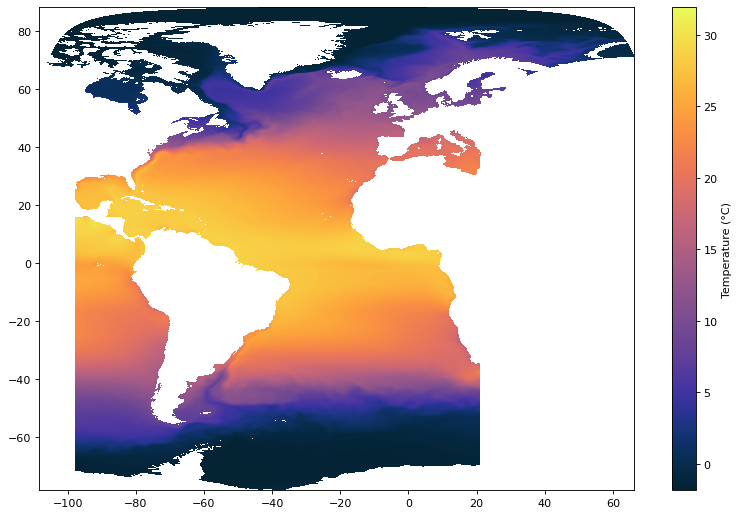

In [3]:
plt.figure(figsize=(12, 8),dpi=500)
ax = plt.axes()
plt.tick_params(axis='both', which='major', labelsize=10)
plt.pcolormesh(dz0_temp.nav_lon,dz0_temp.nav_lat,dz0_temp.thetao[0,0,:,:],cmap=cmocean.cm.thermal)
cbar=plt.colorbar()
cbar.set_label('Temperature (°C)',fontsize=10)
# plt.savefig('MeanTemperature.png',bbox_inches='tight',
#             pad_inches=0.2)

/tmp/ipykernel_2881690/736985196.py:6: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(dz0_temp.nav_lon,dz0_temp.nav_lat,speed,cmap=cmocean.cm.speed)


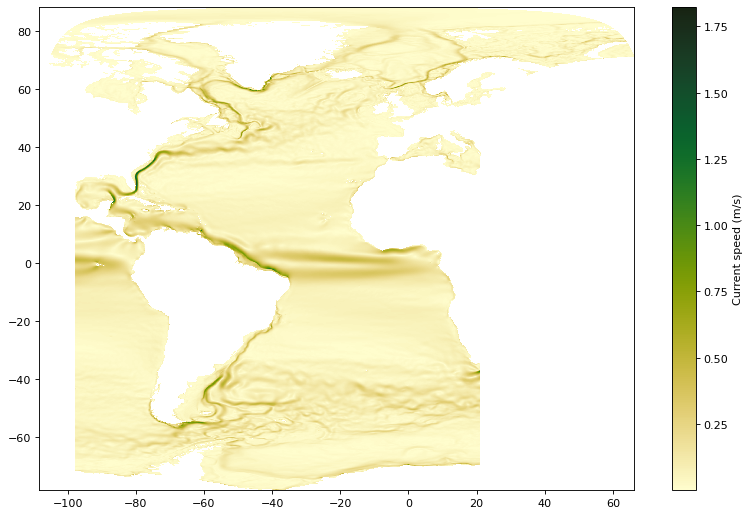

In [4]:
speed=np.sqrt(dz0_v.vo[0,0,:,:]**2+dz0_u.uo[0,0,:,:]**2)

plt.figure(figsize=(12, 8),dpi=500)
ax = plt.axes() #projection=ccrs.PlateCarree()
plt.tick_params(axis='both', which='major', labelsize=10)
plt.pcolormesh(dz0_temp.nav_lon,dz0_temp.nav_lat,speed,cmap=cmocean.cm.speed)
cbar=plt.colorbar()
cbar.set_label('Current speed (m/s)',fontsize=10)
# plt.savefig('CMCC_MeanSpeed_z0.png',bbox_inches='tight',
#             pad_inches=0.2)